In [55]:
from sympy import *
from sympy.vector import Vector
from sympy.vector import CoordSys3D
import IPython.display as disp

N = CoordSys3D('N')

t, k = symbols( 't k' )
n, d, m = symbols('n d m', positive=True, integer=True)
# init_printing(use_unicode=True)
init_printing(use_latex='mathjax')

# Basis for the edge/weight vectors for the points 

v1 = N.i
v2 = N.j

# Define the vector which is not parallel to any edge vector, which will tend to zero:

Phi = t*(v1 + 3*v2)

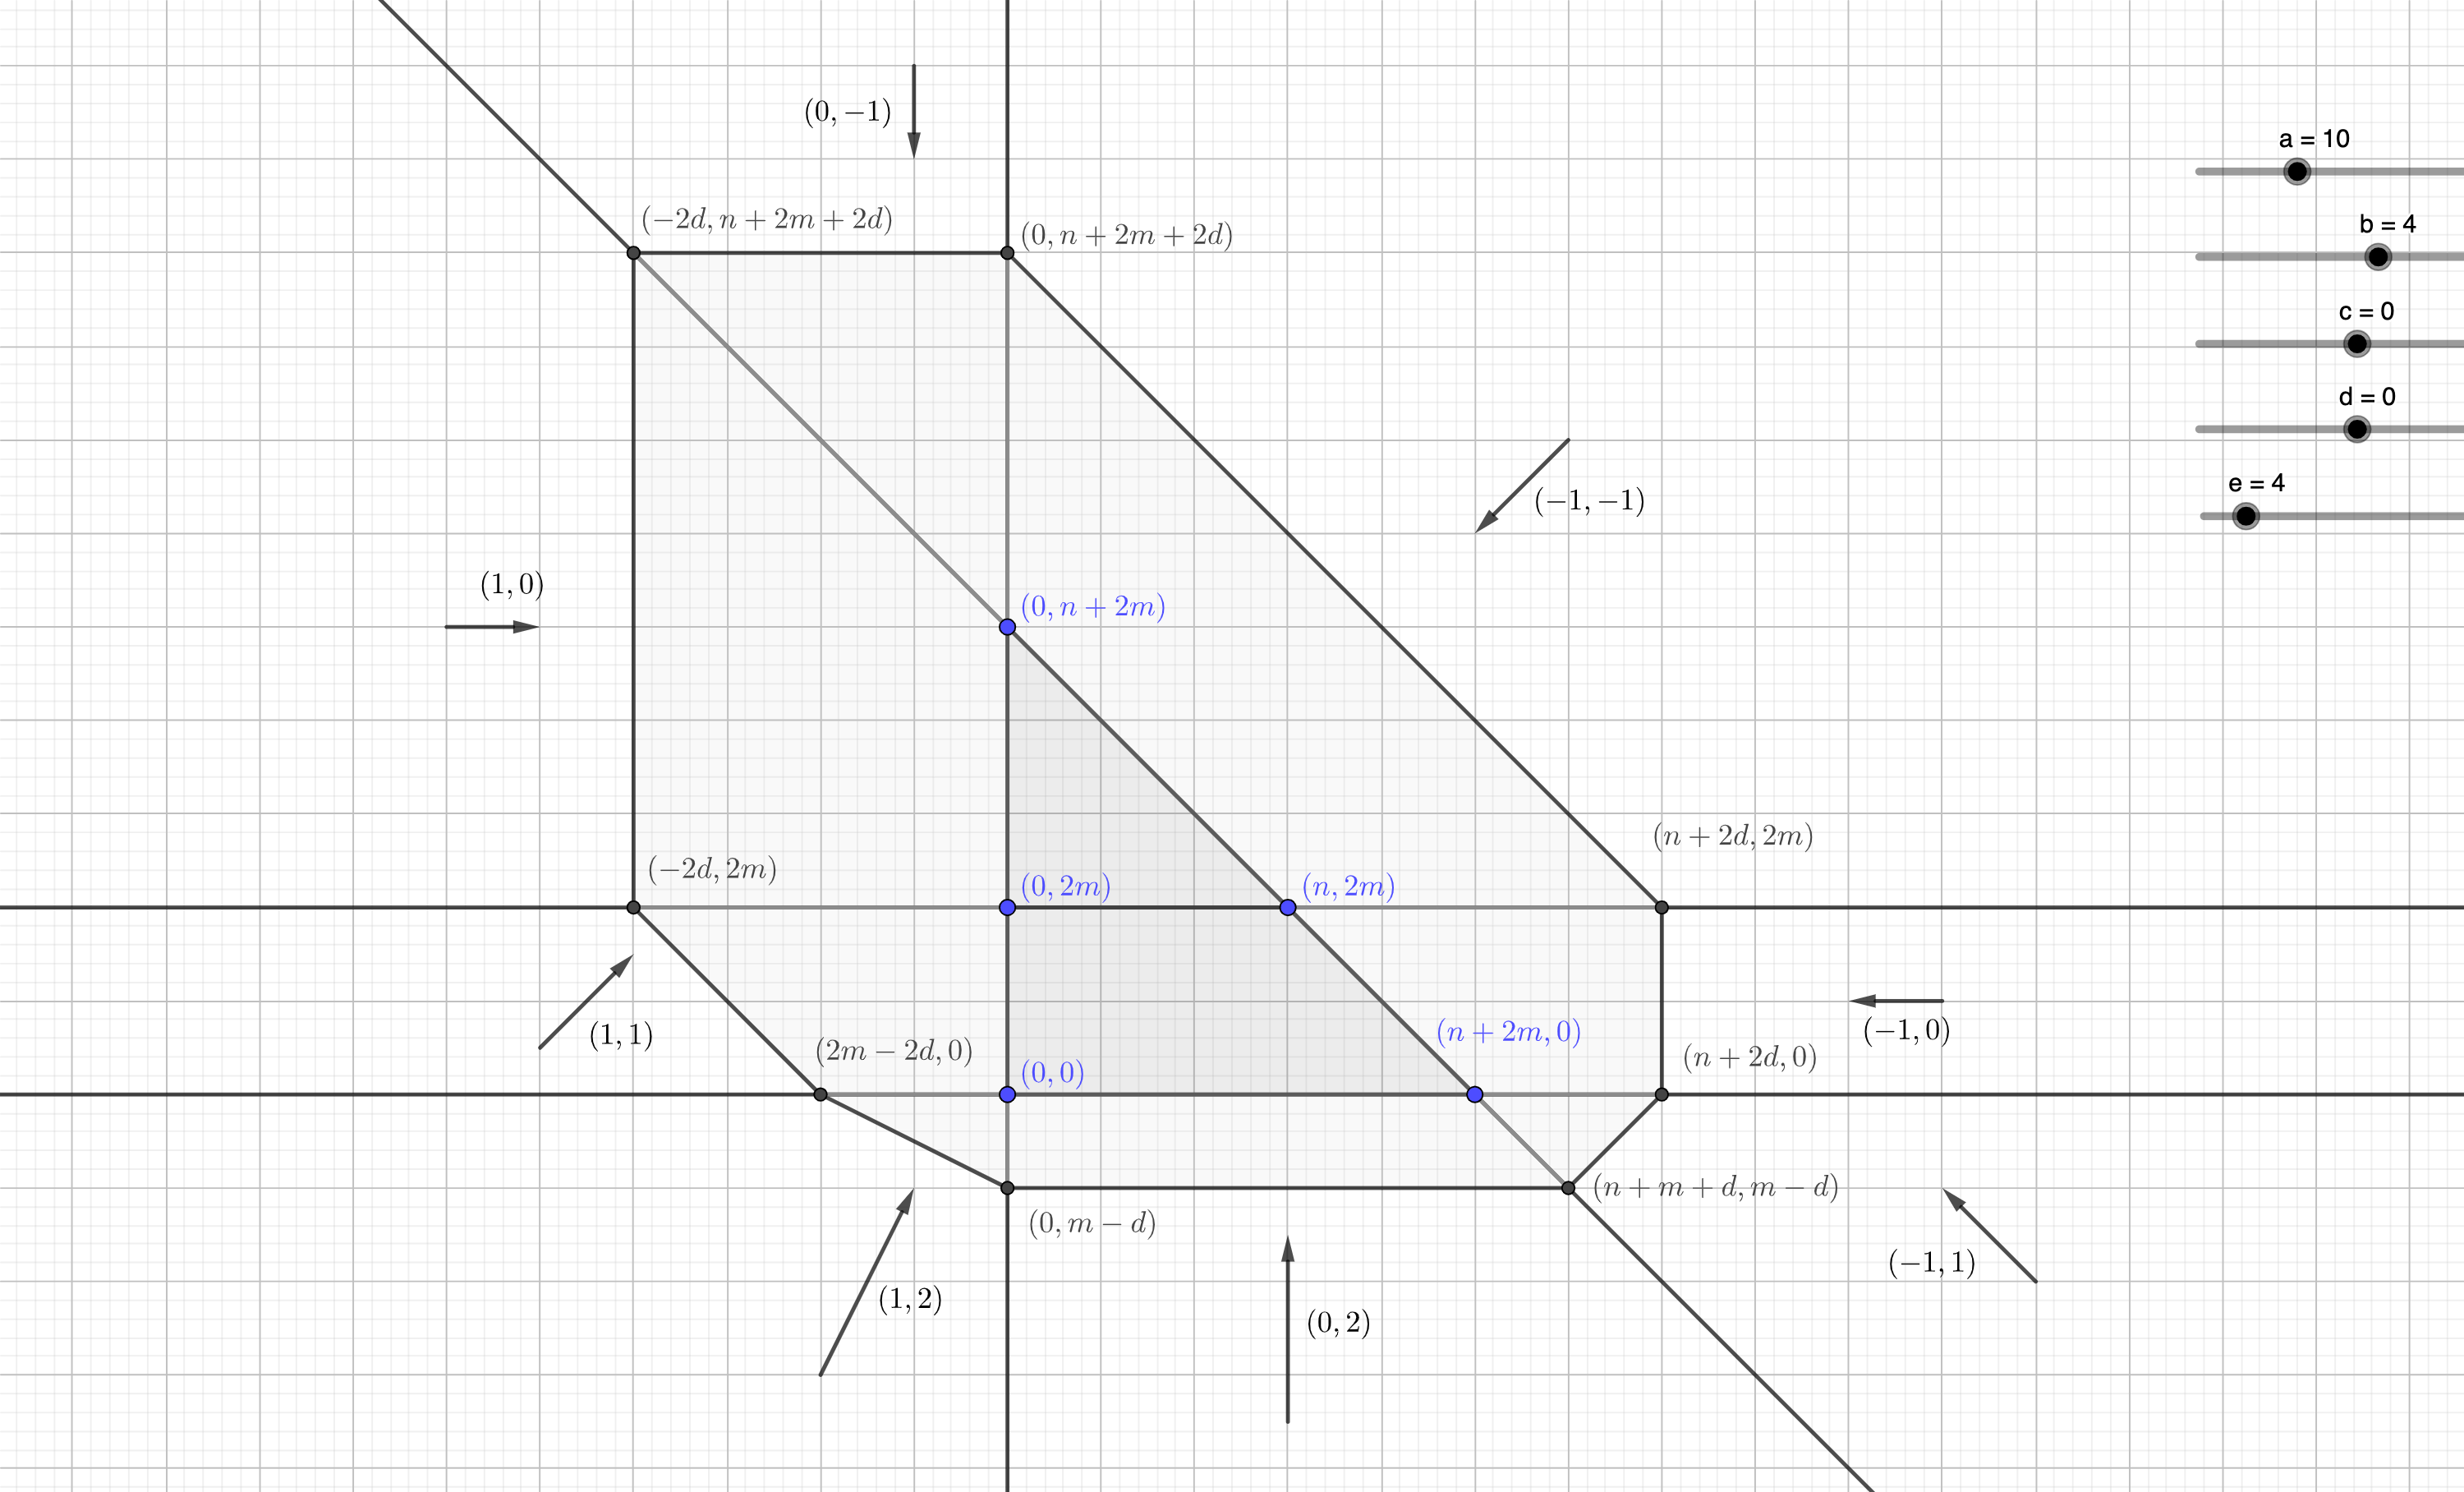

In [86]:
# Set the fixed points of the action; P denotes those that belong
# to the core, and Q those that come from the cut extended core:

def P12(n,m):
    return Vector.zero

def P23(n,m):
    return (2*m + n)*v1

def P34(n,m):
    return n*v1 + 2*m*v2

def P14(n,m):
    return 2*m*v2

def P13(n,m):
    return (2*m + n)*v2

interiorPoints = [P12(n,m), P23(n,m), P34(n,m), P14(n,m), P13(n,m)]

for P in interiorPoints:
    display(P)

0

(2⋅m + n) i_N

(n) i_N + (2⋅m) j_N

(2⋅m) j_N

(2⋅m + n) j_N

In [56]:
def Q12_1(n,m,d):
    return (m-d)*v2

def Q12_2(n,m,d):
    return (2*m-2*d)*v1

def Q23_2(n,m,d):
    return (n+2*d)*v1

def Q23_3(n,m,d):
    return (m+n+d)*v1 + (m-d)*v2

def Q34_4(n,m,d):
    return (n + 2*d)*v1 + 2*m*v2

def Q14_4(n,m,d):
    return -2*d*v1 + 2*m*v2

def Q13_1(n,m,d):
    return (2*m+n+2*d)*v2

def Q13_3(n,m,d):
    return -2*d*v1 + (n + 2*m + 2*d)*v2

# Define the term which is summed over each fixed point,
# representing the character for the representation

def P(P, edge1, edge2, edge3, edge4):
    return exp( Phi.dot(P) ) / ( (1 - exp( Phi.dot(edge1) ) ) * ( 1 - exp( Phi.dot(edge2) ) ) * ( 1 - exp( Phi.dot(edge3) ) ) * ( 1 - exp( Phi.dot(edge4) ) ) )


def Q(P, edge1, edge2):
    return exp( Phi.dot(P) ) / ( (1 - exp( Phi.dot(edge1) ) ) * ( 1 - exp( Phi.dot(edge2) ) ) )

def Exp(p, q):
    return exp( 2*pi*I*Rational(p,q) )

def gExp(g, P):
    return exp( 2*pi*I*g.dot(P) )

def OrbiFactor(p, q, edge):
    return ( 1 - ( Exp(p,q) * exp( Rational(p,q) * Phi.dot(edge) ) ) )

def OrbiSum(Q, p, q, edge1, edge2, edge3, edge4):
    return ( Rational(1,q) * exp( Phi.dot(Q) ) ) / ( (1 - ( Exp(p,q) * exp( Rational(1,q) * Phi.dot(edge1) ) ) ) * (1 - ( Exp(p,q) * exp( Rational(1,q) * Phi.dot(edge2) ) ) ) * (1 - ( Exp(p,q) * exp( Rational(1,q) * Phi.dot(edge3) ) ) ) * (1 - ( Exp(p,q) * exp( Rational(1,q) * Phi.dot(edge4) ) ) ) ) 

def gOrbiSum(Q, q, g, edge1, edge2, edge3, edge4):
    return ( Rational(1,q) * exp( Phi.dot(Q) ) ) / ( (1 - ( gExp(g,edge1) * exp( Phi.dot(edge1) ) ) ) * (1 - ( gExp(g,edge2) * exp( Phi.dot(edge2) ) ) ) * (1 - ( gExp(g,edge3) * exp( Phi.dot(edge3) ) ) ) * (1 - ( gExp(g,edge4) * exp( Phi.dot(edge4) ) ) ) ) 

def OrbiHalfSum(Q, p, q, edge1, edge2, edge3, edge4):
    return ( Rational(1,q) * exp( Phi.dot(Q) )  ) / ( (1 - ( Exp(p,q) * exp( Rational(1,q) * Phi.dot(edge1) ) ) ) * (1 - ( Exp(p,q) * exp( Rational(1,q) * Phi.dot(edge2) ) ) ) * (1 - ( Exp(p,q) * exp( Rational(1,q) * Phi.dot(edge3) ) ) ) * (1 - ( Exp(p,q) * exp( Rational(1,q) * Phi.dot(edge4) ) ) ) ) 

boundaryPoints = [Q12_1(n,m,d), Q12_2(n,m,d), Q23_2(n,m,d), Q23_3(n,m,d), Q34_4(n,m,d), Q14_4(n,m,d), Q13_1(n,m,d), Q13_3(n,m,d)]

for Q in boundaryPoints:
    display(Q)

(-d + m) j_N

(-2⋅d + 2⋅m) i_N

(2⋅d + n) i_N

(d + m + n) i_N + (-d + m) j_N

(2⋅d + n) i_N + (2⋅m) j_N

(-2⋅d) i_N + (2⋅m) j_N

(2⋅d + 2⋅m + n) j_N

(-2⋅d) i_N + (2⋅d + 2⋅m + n) j_N

In [57]:
# gOrbiSum(Q, q, g, edge1, edge2, edge3, edge4)

display( gOrbiSum(Q12_1(n,m,d), 2, Vector.zero, v1, Rational(1,2)*v2, Rational(1,2)*v2, -Rational(1,2)*v1 + Rational(1,2)*v2) )

display( gOrbiSum(Q12_1(n,m,d), 2, Rational(1,2)*v2, v1, Rational(1,2)*v2, Rational(1,2)*v2, -Rational(1,2)*v1 + Rational(1,2)*v2) )

      3⋅t⋅(-d + m)     
     ℯ                 
───────────────────────
                      2
            ⎛     3⋅t⎞ 
          2 ⎜     ───⎟ 
  ⎛     t⎞  ⎜      2 ⎟ 
2⋅⎝1 - ℯ ⎠ ⋅⎝1 - ℯ   ⎠ 

              3⋅t⋅(-d + m)             
             ℯ                         
───────────────────────────────────────
                                      2
                        ⎛     3⋅t    ⎞ 
                        ⎜     ───    ⎟ 
  ⎛     t⎞ ⎛     t    ⎞ ⎜      2     ⎟ 
2⋅⎝1 - ℯ ⎠⋅⎝- ⅈ⋅ℯ  + 1⎠⋅⎝- ⅈ⋅ℯ    + 1⎠ 

In [58]:
def TermP12(n,m):
    return P(P12(n,m), v1, v2, -v1, -v2)

def TermP23(n,m):
    return P(P23(n,m), v1, -v1 + v2, -v1, v1 - v2)

def TermP34(n,m):
    return P(P34(n,m), v1, -v1 + v2, -v1, v1 - v2)

def TermP14(n,m):
    return P(P14(n,m), v1, v2, -v1, -v2)

def TermP13(n,m):
    return P(P13(n,m), v1 - v2, v2, -v1 + v2, -v2)

def InteriorSum(n,d):
    return TermP12(n,m) + TermP23(n,m) + TermP34(n,m) + TermP14(n,m) + TermP13(n,m)

InteriorSum(n,d)

                t⋅(2⋅m + n)                                 6⋅m⋅t + n⋅t       
               ℯ                                           ℯ                  
───────────────────────────────────────── + ──────────────────────────────────
⎛     -2⋅t⎞ ⎛     -t⎞ ⎛     t⎞ ⎛     2⋅t⎞   ⎛     -2⋅t⎞ ⎛     -t⎞ ⎛     t⎞ ⎛  
⎝1 - ℯ    ⎠⋅⎝1 - ℯ  ⎠⋅⎝1 - ℯ ⎠⋅⎝1 - ℯ   ⎠   ⎝1 - ℯ    ⎠⋅⎝1 - ℯ  ⎠⋅⎝1 - ℯ ⎠⋅⎝1 

                             6⋅m⋅t                                            
                            ℯ                                             1   
─────── + ───────────────────────────────────────── + ────────────────────────
   2⋅t⎞   ⎛     -3⋅t⎞ ⎛     -t⎞ ⎛     t⎞ ⎛     3⋅t⎞   ⎛     -3⋅t⎞ ⎛     -t⎞ ⎛ 
- ℯ   ⎠   ⎝1 - ℯ    ⎠⋅⎝1 - ℯ  ⎠⋅⎝1 - ℯ ⎠⋅⎝1 - ℯ   ⎠   ⎝1 - ℯ    ⎠⋅⎝1 - ℯ  ⎠⋅⎝1

                                     3⋅t⋅(2⋅m + n)               
                                    ℯ                            
───────────────── + ─────────────────────────────────────────────
    t⎞ ⎛  

In [59]:
def TermQ12_2(n,m,d):
    return P(Q12_2(n,m,d), v1, v1, -v1 + v2, 2*v1 - v2)

def TermQ23_2(n,m,d):
    return P(Q23_2(n,m,d), -v1, -v1, v2, -v1 - v2)

def TermQ34_4(n,m,d):
    return P(Q34_4(n,m,d), -v1, -v1, -v2, -v1 + v2)

def TermQ14_4(n,m,d):
    return P(Q14_4(n,m,d), v1, v1, v1 - v2, v2)

def TermQ13_1(n,m,d):
    return P(Q13_1(n,m,d), -v2, -v2, v1 - v2, -v1)

def TermQ13_3(n,m,d):
    return P(Q13_3(n,m,d), v1 - v2, v1 - v2, v1, -v2)

# Q12_1 is an orbifold point of order 2:

def TermQ12_1(n,m,d):
    return gOrbiSum(Q12_1(n,m,d), 2, Vector.zero, v1, Rational(1,2)*v2, Rational(1,2)*v2, -v1 + Rational(1,2)*v2) + gOrbiSum(Q12_1(n,m,d), 2, v2, v1, Rational(1,2)*v2, Rational(1,2)*v2, -v1 + Rational(1,2)*v2)

# Q23_3 is an orbifold point of order 2:

def TermQ23_3(n,m,d):
    return gOrbiSum(Q23_3(n,m,d), 2, Vector.zero, Rational(1,2)*v1 + Rational(1,2)*v2, -Rational(1,2)*v1 + Rational(1,2)*v2, -Rational(1,2)*v1 + Rational(1,2)*v2, -v1) + gOrbiSum(Q23_3(n,m,d), 2, v2, Rational(1,2)*v1 + Rational(1,2)*v2, -Rational(1,2)*v1 + Rational(1,2)*v2, -Rational(1,2)*v1 + Rational(1,2)*v2, -v1)

In [42]:
display( TermQ12_1(n,m,d) )
display( TermQ23_3(n,m,d) )

          3⋅t⋅(-d + m)                      3⋅t⋅(-d + m)         
         ℯ                                 ℯ                     
─────────────────────────────── + ───────────────────────────────
                              2                                 2
           ⎛ t    ⎞ ⎛ 3⋅t    ⎞      ⎛     t⎞          ⎛     3⋅t⎞ 
           ⎜ ─    ⎟ ⎜ ───    ⎟      ⎜     ─⎟          ⎜     ───⎟ 
  ⎛     t⎞ ⎜ 2    ⎟ ⎜  2     ⎟      ⎜     2⎟ ⎛     t⎞ ⎜      2 ⎟ 
2⋅⎝1 - ℯ ⎠⋅⎝ℯ  + 1⎠⋅⎝ℯ    + 1⎠    2⋅⎝1 - ℯ ⎠⋅⎝1 - ℯ ⎠⋅⎝1 - ℯ   ⎠ 

  3⋅t⋅(-d + m) + t⋅(d + m + n)       3⋅t⋅(-d + m) + t⋅(d + m + n)  
 ℯ                                  ℯ                              
──────────────────────────────── + ────────────────────────────────
                    2                                  2           
  ⎛     -t⎞ ⎛ t    ⎞  ⎛ 2⋅t    ⎞     ⎛     -t⎞ ⎛     t⎞  ⎛     2⋅t⎞
2⋅⎝1 - ℯ  ⎠⋅⎝ℯ  + 1⎠ ⋅⎝ℯ    + 1⎠   2⋅⎝1 - ℯ  ⎠⋅⎝1 - ℯ ⎠ ⋅⎝1 - ℯ   ⎠

In [60]:
def InteriorSum(n,m):
    return TermP12(n,m) + TermP23(n,m) + TermP34(n,m) + TermP13(n,m) + TermP14(n,m)

def ExteriorSum(n,m,d):
    return TermQ12_1(n,m,d) + TermQ12_2(n,m,d) + TermQ23_2(n,m,d) + TermQ23_3(n,m,d) + TermQ34_4(n,m,d) + TermQ13_1(n,m,d) + TermQ13_3(n,m,d) + TermQ14_4(n,m,d)

ExteriorSum(n,m,d)

          3⋅t⋅(-d + m)                      3⋅t⋅(-d + m)              3⋅t⋅(-d 
         ℯ                                 ℯ                         ℯ        
─────────────────────────────── + ─────────────────────────────── + ──────────
                              2                                 2             
           ⎛ t    ⎞ ⎛ 3⋅t    ⎞      ⎛     t⎞          ⎛     3⋅t⎞      ⎛     -t
           ⎜ ─    ⎟ ⎜ ───    ⎟      ⎜     ─⎟          ⎜     ───⎟    2⋅⎝1 - ℯ  
  ⎛     t⎞ ⎜ 2    ⎟ ⎜  2     ⎟      ⎜     2⎟ ⎛     t⎞ ⎜      2 ⎟              
2⋅⎝1 - ℯ ⎠⋅⎝ℯ  + 1⎠⋅⎝ℯ    + 1⎠    2⋅⎝1 - ℯ ⎠⋅⎝1 - ℯ ⎠⋅⎝1 - ℯ   ⎠              

+ m) + t⋅(d + m + n)             t⋅(-2⋅d + 2⋅m)             3⋅t⋅(-d + m) + t⋅(
                                ℯ                          ℯ                  
────────────────────── + ────────────────────────────── + ────────────────────
          2                                2                                  
⎞ ⎛ t    ⎞  ⎛ 2⋅t    ⎞   ⎛     -t⎞ ⎛     t⎞  ⎛     

In [61]:
def TotalSum(n,m,d):
    return InteriorSum(n,m) + ExteriorSum(n,m,d)

TotalSum(n,m,d)

          3⋅t⋅(-d + m)                      3⋅t⋅(-d + m)              3⋅t⋅(-d 
         ℯ                                 ℯ                         ℯ        
─────────────────────────────── + ─────────────────────────────── + ──────────
                              2                                 2             
           ⎛ t    ⎞ ⎛ 3⋅t    ⎞      ⎛     t⎞          ⎛     3⋅t⎞      ⎛     -t
           ⎜ ─    ⎟ ⎜ ───    ⎟      ⎜     ─⎟          ⎜     ───⎟    2⋅⎝1 - ℯ  
  ⎛     t⎞ ⎜ 2    ⎟ ⎜  2     ⎟      ⎜     2⎟ ⎛     t⎞ ⎜      2 ⎟              
2⋅⎝1 - ℯ ⎠⋅⎝ℯ  + 1⎠⋅⎝ℯ    + 1⎠    2⋅⎝1 - ℯ ⎠⋅⎝1 - ℯ ⎠⋅⎝1 - ℯ   ⎠              

+ m) + t⋅(d + m + n)             t⋅(-2⋅d + 2⋅m)             3⋅t⋅(-d + m) + t⋅(
                                ℯ                          ℯ                  
────────────────────── + ────────────────────────────── + ────────────────────
          2                                2                                  
⎞ ⎛ t    ⎞  ⎛ 2⋅t    ⎞   ⎛     -t⎞ ⎛     t⎞  ⎛     

In [63]:
#limit(TotalSum(2*m,m,d), t, 0)
series(TotalSum(n,m,d), t, 0)

      ⎛    5       4                  4                              3        
      ⎜13⋅d    29⋅d ⋅m      4     65⋅d        3  2       3       87⋅d ⋅m      
1 + t⋅⎜───── + ─────── + 6⋅d ⋅n + ───── + 15⋅d ⋅m  + 20⋅d ⋅m⋅n + ─────── + 5⋅d
      ⎝  6        2                 8                               2         

                     3       2  3                    2  2                     
3  2       3     45⋅d    29⋅d ⋅m       2  2     135⋅d ⋅m       2    2       2 
 ⋅n  + 18⋅d ⋅n + ───── - ──────── + 8⋅d ⋅m ⋅n + ───────── + 7⋅d ⋅m⋅n  + 45⋅d ⋅
                   4        3                       4                         

           2        2  3       2  2        2         2        4         3     
      581⋅d ⋅m   4⋅d ⋅n    45⋅d ⋅n    233⋅d ⋅n   55⋅d    3⋅d⋅m    20⋅d⋅m ⋅n   
m⋅n + ──────── + ─────── + ──────── + ──────── + ───── + ────── - ───────── - 
         12         3         4          12        8       2          3       

      3                               2          

In [64]:
limit(TotalSum(n,m,d), t, 0)

    4       3         3         3                            2                
17⋅d    10⋅d ⋅m   10⋅d ⋅n   17⋅d       2  2      2       15⋅d ⋅m    2  2   15⋅
───── + ─────── + ─────── + ───── - 3⋅d ⋅m  + 2⋅d ⋅m⋅n + ─────── + d ⋅n  + ───
  6        3         3        2                             2                 

 2         2        3                   2                          2          
d ⋅n   29⋅d    2⋅d⋅m         2     9⋅d⋅m                      3⋅d⋅n    17⋅d⋅n 
──── + ───── + ────── - 2⋅d⋅m ⋅n - ────── + 3⋅d⋅m⋅n + 5⋅d⋅m + ────── + ────── 
2        3       3                   2                          2        3    

         4      3      3      2        2                2          
        m    2⋅m ⋅n   m    3⋅m ⋅n   5⋅m    5⋅m⋅n       n    3⋅n    
+ 5⋅d + ── + ────── + ── - ────── - ──── + ───── + m + ── + ─── + 1
        6      3      2      2       3       6         2     2     

In [78]:
def RR(n,m,d):
    return factor(17*d**4/6 + 10*d**3*m/3 + 10*d**3*n/3 + 17*d**3/2 - 3*d**2*m**2 + 2*d**2*m*n + 15*d**2*m/2 + d**2*n**2 + 15*d**2*n/2 + 29*d**2/3 + 2*d*m**3/3 - 2*d*m**2*n - 9*d*m**2/2 + 3*d*m*n + 5*d*m + 3*d*n**2/2 + 17*d*n/3 + 5*d + m**4/6 + 2*m**3*n/3 + m**3/2 - 3*m**2*n/2 - 5*m**2/3 + 5*m*n/6 + m + n**2/2 + 3*n/2 + 1)

def dWeight(n,m,d):
    return simplify(RR(n,m,d) - RR(n,m,d-1))

In [85]:
dWeight(2,10,1)

-156.000000000000